In [14]:
import csv

input_file = 'data/Crime_rate_1960-2019.csv'
output_file = 'data/clean_Crime_rate_1960-2019.csv'

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for row in reader:
        # Remove commas from each element in the row
        row_without_commas = [element.replace(',', '') for element in row]
        # Remove column 1,2
        del row_without_commas[1:3]
        writer.writerow(row_without_commas)


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

monthly_inflation_rates = pd.read_csv('data/US_inflation_rates.csv')

In [16]:
# the following code computes the weighted annual inflation rate and filters years

years = []
inflations = []
inflation_array = []
previous = 0.0
not_found = True
cur_year = ''
cycle = False
for x in monthly_inflation_rates.values:
  if not_found:
    date = x[0]
    if date.startswith('1959-12-01'):
      not_found = False
    else:
      continue
  else:
    date = x[0]
    if cur_year == '':
      if cycle:
        cur_infl = x[1]
        infl = (cur_infl-previous)/previous
        inflation_array.append(infl)
        # previous = cur_infl
        np_array = np.array(inflation_array)
        inflation_array = []
        sum = np_array.sum()
        inflations.append(sum)
      cur_year = date[:4]
      if cur_year.startswith('2020'):
        break
      previous = x[1]
      Y = int(cur_year)
      years.append(Y)
    else:
      cur_infl = x[1]
      infl = (cur_infl-previous)/previous
      infl*=100
      # rounded = round(infl, 3)
      inflation_array.append(infl)
      previous = cur_infl
      if date[5:7]=='12':
        cur_year = ''
        cycle = True


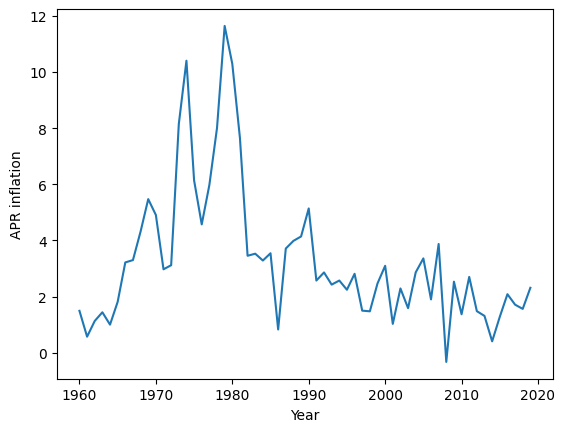

In [17]:
plt.plot(years, inflations)
plt.ylabel("APR inflation")
plt.xlabel("Year")
plt.show()

In [151]:
crimes = pd.read_csv('data/Crime_rate_1960-2019.csv')


In [18]:
def convertToInt(arr):
  out = []
  for x in arr:
    # x = x[0:4]
    # print(x)
    converted = np.double(x)
    out.append(converted)
  return out

In [153]:
start = True
previous = 0
growth = []
year_growth = []

for x in crimes.values:
  y = x[0]
  p = x[3]
  p = p.replace(',','')
  year = np.int16(y)
  pop = np.double(p)
  if start:
    previous = pop
    start = False
    continue
  else:
    cur_growth = (pop - previous) / previous
    cur_growth *= 100
    growth.append(cur_growth)
    year_growth.append(year)
    previous = pop



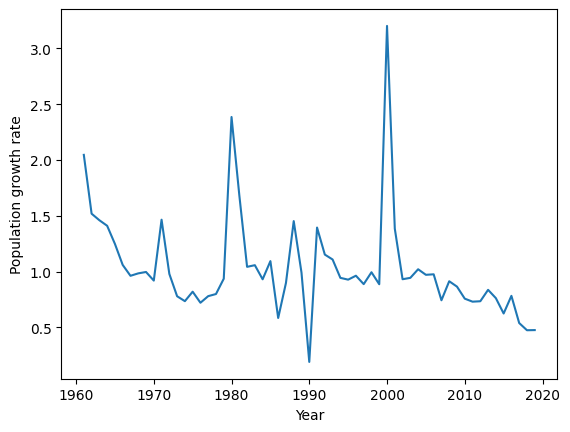

In [154]:
plt.plot(year_growth, growth)
plt.ylabel("Population growth rate")
plt.xlabel("Year")
plt.show()

In [155]:
def computeChange(data, years):
  start = True
  previous = 0
  growth = []
  year_growth = []

  for i in range(len(data)):
    cur = data[i]
    if start:
      previous = cur
      start = False
      continue
    else:
      year = years[i]
      cur_growth = (cur - previous) / previous
      cur_growth *= 100
      growth.append(cur_growth)
      year_growth.append(year)
      previous = pop

  return (growth, year_growth)

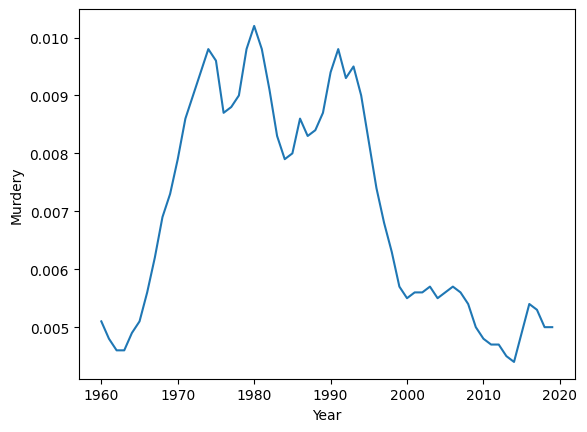

In [156]:
years_crime = crimes['Year\xa0']
murders = crimes['Murder\xa0']

mur = convertToInt(murders)
year_crime = convertToInt(years_crime)
#convert mur to np array
mur = np.array(mur)
year_crime = np.array(year_crime)
mur = (mur/100000)*100
plt.plot(year_crime, mur)
plt.ylabel("Murdery")
plt.xlabel("Year")
plt.show()

In [157]:
mur_growth, mur_year = computeChange(mur, year_crime)

murr_corr = pd.Series(mur_growth)
pop_corr = pd.Series(growth)
murr_corr.corr(pop_corr)

0.2916850361008071

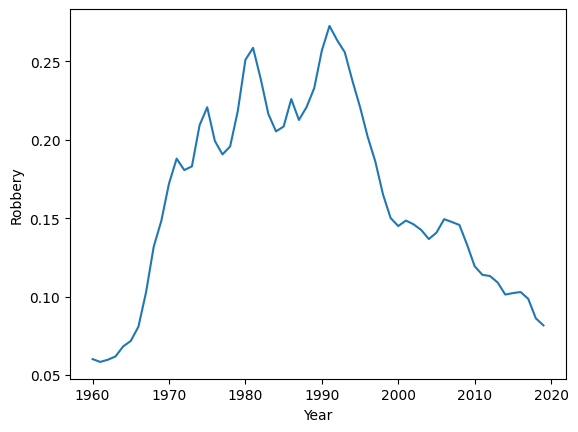

In [158]:
thefts = crimes['Robbery\xa0']
roberry = convertToInt(thefts)
roberry = (np.array(roberry)/100000)*100
plt.plot(year_crime, roberry)
plt.ylabel("Robbery")
plt.xlabel("Year")
plt.show()

In [159]:
roberry_growth, rob_year = computeChange(roberry, year_crime)

rob_corr = pd.Series(roberry_growth)
rob_corr.corr(pop_corr)

0.2916850362220492

In [160]:
murr_corr.corr(rob_corr)

0.9999999999999999

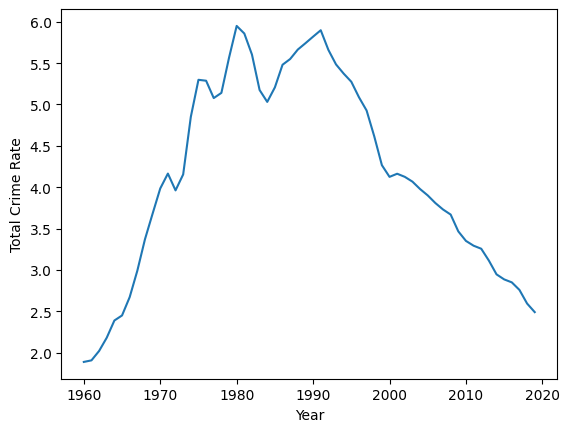

In [161]:
Y = crimes['Year\xa0']
years_ratio = convertToInt(Y)

population = []
total = []
for x in crimes.values:
  pop = x[3]
  tot = x[4]
  pop = pop.replace(",", "")
  tot = tot.replace(",", "")
  pop = np.double(pop)
  tot = np.double(tot)
  total.append(tot)
  population.append(pop)


for i in range(len(total)):
  popul = population[i]
  k = popul / 100000
  total_crimes = total[i] * k
  total[i] = total_crimes / popul
  total[i] *= 100
  # total[i] = total_crimes

# plt.plot(years_ratio, population)
plt.plot(years_ratio, total)
plt.xlabel("Year")
plt.ylabel("Total Crime Rate")
plt.show()

In [162]:
ratio_growth, Y_ratio_growth = computeChange(total, years_ratio)
ratio_corr = pd.Series(ratio_growth)

ratio_corr.corr(pop_corr)

0.29168503887387814

In [163]:
total_correlated = pd.Series(total)
growth_correlated = pd.Series(growth)

total_correlated.corr(growth_correlated)

0.011635503443073519

In [164]:
inflation_corr = pd.Series(inflations)
growth_corr = pd.Series(growth)

print(inflation_corr.corr(growth_corr))

0.18050563276974296


In [2]:
property = []
for x in crimes.values:
  prop = x[6]
  tot = tot.replace(",", "")
  tot = np.double(tot)
  property.append(prop)
print(property)

NameError: name 'crimes' is not defined

In [ ]:
# bar chart of different types of crimes
print(crimes.columns)
violent = crimes['Violent\xa0']
prop = crimes['Property\xa0']
murr = crimes['Murder\xa0']
rape = crimes['Forcible Rape\xa0']
agg_assault = crimes['Aggravated assault\xa0']
burglary = crimes['Burglary\xa0']
larceny = crimes['Larceny Theft\xa0']
motor = crimes['Vehicle Theft\xa0']
print(prop)
violent = convertToInt(violent)
prop = convertToInt(prop)
murr = convertToInt(murr)
rape = convertToInt(rape)
agg_assault = convertToInt(agg_assault)
burglary = convertToInt(burglary)
larceny = convertToInt(larceny)
motor = convertToInt(motor)

violent = (np.array(violent)/100000)*100
prop = (np.array(prop)/100000)*100
murr = (np.array(murr)/100000)*100
rape = (np.array(rape)/100000)*100
agg_assault = (np.array(agg_assault)/100000)*100
burglary = (np.array(burglary)/100000)*100
larceny = (np.array(larceny)/100000)*100
motor = (np.array(motor)/100000)*100

#bar chart of different types of crimes
plt.bar(year_crime, violent)
plt.bar(year_crime, prop)



Index(['Year ', 'Unnamed: 1', 'Unnamed: 2', 'Population ', 'Total ',
       'Violent ', 'Property ', 'Murder ', 'Forcible Rape ', 'Robbery ',
       'Aggravated assault ', 'Burglary ', 'Larceny Theft ', 'Vehicle Theft '],
      dtype='object')
0     1,726.3 
1     1,747.9 
2     1,857.5 
3     2,012.1 
4     2,197.5 
5     2,248.8 
6     2,450.9 
7     2,736.5 
8     3,071.8 
9     3,351.3 
10    3,621.0 
11    3,768.8 
12    3,560.4 
13    3,737.0 
14    4,389.3 
15    4,810.7 
16    4,819.5 
17    4,601.7 
18    4,642.5 
19    5,016.6 
20    5,353.3 
21    5,263.8 
22    5,032.5 
23    4,637.3 
24    4,492.1 
25    4,650.5 
26    4,881.8 
27    4,940.3 
28    5,027.1 
29    5,077.9 
30    5,088.5 
31    5,139.7 
32    4,902.7 
33    4,737.7 
34    4,660.0 
35    4,591.3 
36    4,451.0 
37    4,316.3 
38    4,049.1 
39    3,743.6 
40    3,618.3 
41    3,658.1 
42    3,630.6 
43    3,591.20
44    3,514.1 
45    3,431.5 
46    3,334.5 
47    3,263.5 
48    3,211.5 
49    3,036.1 
50    

ValueError: could not convert string to float: '1,726.3\xa0'